# Домашняя работа 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка необходимых данных 

In [2]:
def het_data_by_country(country: str) -> pd.DataFrame:
    dataset = pd.read_csv('owid-covid-data.csv', usecols=[0, 1, 2, 3, 4])
    dataset = dataset[(dataset['location'] == 'Russia') & (dataset['date'] >= '2020-03-03')]
    dataset.replace({'new_cases': {0: 1}}, inplace=True)
    return dataset

dataset = het_data_by_country('Russia')
dataset.head()

,iso_code,location,date,total_cases,new_cases
13775,RUS,Russia,2020-03-03,3,1
13776,RUS,Russia,2020-03-04,4,1
13777,RUS,Russia,2020-03-05,4,1
13778,RUS,Russia,2020-03-06,4,1
13779,RUS,Russia,2020-03-07,10,6


In [3]:
dataset.shape

(73, 5)

### Экспонента

In [4]:
train_dataset = dataset.iloc[:50]
test_dataset = dataset.iloc[50:]

In [5]:
train_dataset.shape, test_dataset.shape

((50, 5), (23, 5))

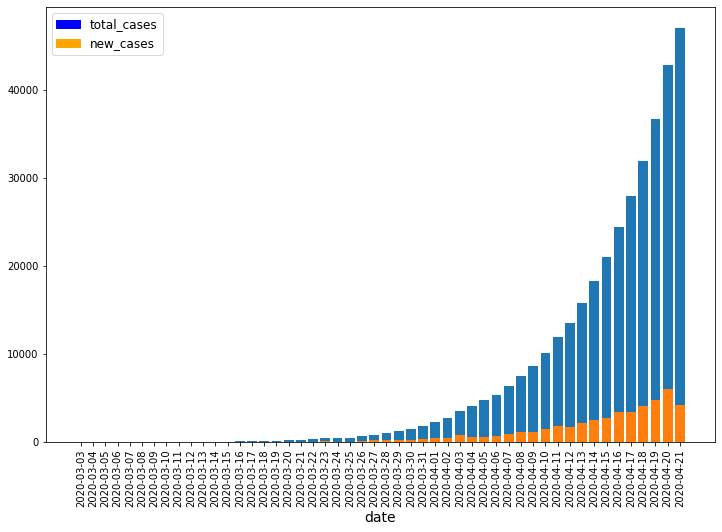

In [6]:
colors = {'total_cases':'blue', 'new_cases': 'orange'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.figure(figsize=(12, 8))
plt.bar(train_dataset['date'], train_dataset['total_cases'])
plt.bar(train_dataset['date'], train_dataset['new_cases'])
plt.xlabel('date', fontsize=14)
plt.xticks(rotation=90)
plt.legend(handles, labels, loc='best', fontsize=12)

In [7]:
y_train = train_dataset['total_cases'].values
x_train = np.arange(1, 1 + len(train_dataset['date'].values), 1)
assert len(y_train) == len(x_train)

In [8]:
from sklearn import linear_model

# обучение линеной регресии
regr = linear_model.LinearRegression().fit(x_train.reshape(-1, 1), np.log(y_train))

In [9]:
x_test = np.arange(51, 50 + len(test_dataset['date'].values) + 1, 1)
x_test

array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In [10]:
x_test_date = dict(zip(test_dataset['date'].values, x_test))
x_test_date

{'2020-04-22': 51,
 '2020-04-23': 52,
 '2020-04-24': 53,
 '2020-04-25': 54,
 '2020-04-26': 55,
 '2020-04-27': 56,
 '2020-04-28': 57,
 '2020-04-29': 58,
 '2020-04-30': 59,
 '2020-05-01': 60,
 '2020-05-02': 61,
 '2020-05-03': 62,
 '2020-05-04': 63,
 '2020-05-05': 64,
 '2020-05-06': 65,
 '2020-05-07': 66,
 '2020-05-08': 67,
 '2020-05-09': 68,
 '2020-05-10': 69,
 '2020-05-11': 70,
 '2020-05-12': 71,
 '2020-05-13': 72,
 '2020-05-14': 73}

In [11]:
x_test_date['2020-05-01']

60

In [12]:
# предсказания линеной регресии
y_pred = np.exp(regr.predict(x_test.reshape(-1, 1)))
y_pred

array([ 113888.51263125,  139560.80506631,  171020.04285383,
        209570.69604055,  256811.2830872 ,  314700.65408445,
        385639.21526592,  472568.46282564,  579092.9532501 ,
        709629.76771399,  869591.66814163, 1065611.53957413,
       1305817.42543629, 1600169.56015184, 1960873.37430118,
       2402885.59774779, 2944534.44650473, 3608279.60964081,
       4421643.54939179, 5418352.73121319, 6639736.10534113,
       8136438.82846649, 9970522.28568596])

In [13]:
y_test = test_dataset['total_cases'].values
y_test

array([ 52763,  57999,  62773,  68622,  74588,  80949,  87147,  93558,
        99399, 106498, 114431, 124054, 134687, 145268, 155370, 165929,
       177160, 187859, 198676, 209688, 221344, 232243, 242271],
      dtype=int64)

In [14]:
x_test = np.arange(1 + len(train_dataset['date'].values), 73 + 1, 1)
x_test

array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

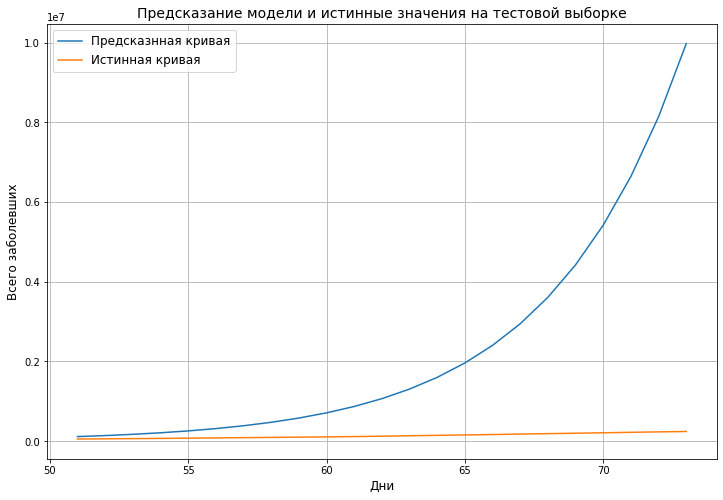

In [15]:
plt.figure(figsize=(12, 8))
plt.title('Предсказание модели и истинные значения на тестовой выборке', fontsize=14)
plt.plot(x_test, y_pred, label='Предсказнная кривая')
plt.plot(x_test, y_test, label='Истинная кривая')
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Всего заболевших', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid()

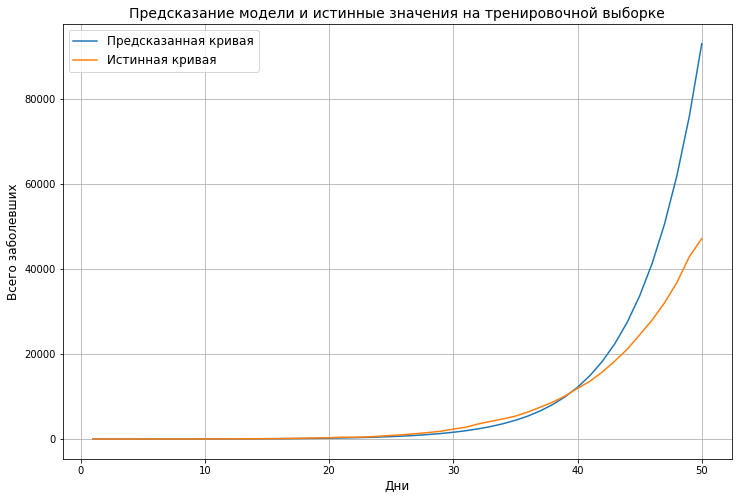

In [16]:
y_pred_tr = np.exp(regr.predict(x_train.reshape(-1, 1)))

plt.figure(figsize=(12, 8))
plt.title('Предсказание модели и истинные значения на тренировочной выборке', fontsize=14)
plt.plot(x_train, y_pred_tr, label='Предсказанная кривая')
plt.plot(x_train, y_train, label='Истинная кривая')
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Всего заболевших', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid()

In [17]:
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(
    y_train,
    np.exp(regr.predict(x_train.reshape(-1, 1))),
    #squared=False, # if True - MSE
))

test_rmse = np.sqrt(mean_squared_error(
    y_test,
    np.exp(regr.predict(x_test.reshape(-1, 1))),
    #squared=False, # if True - MSE
))

all_rmse = np.sqrt(mean_squared_error(
    np.concatenate([y_train, y_test], axis=0),
    np.exp(regr.predict(np.concatenate([x_train, x_test], axis=0).reshape(-1, 1))),
    #squared=False, # if True - MSE
))

print('RMSE на тренировочных данных: {:.3f}'.format(train_rmse))
print('RMSE на тренировочных данных: {:.3f}'.format(test_rmse))

RMSE на тренировочных данных: 9480.331
RMSE на тренировочных данных: 3469103.146


In [18]:
train_rmse_log = np.sqrt(mean_squared_error(
    np.log(y_train),
    regr.predict(x_train.reshape(-1, 1)),
    #squared=False, # if True - MSE
))

train_rmse_log

0.3588494786514787

### Байесовский вывод

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15, 8)
legend_fontsize = 16

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


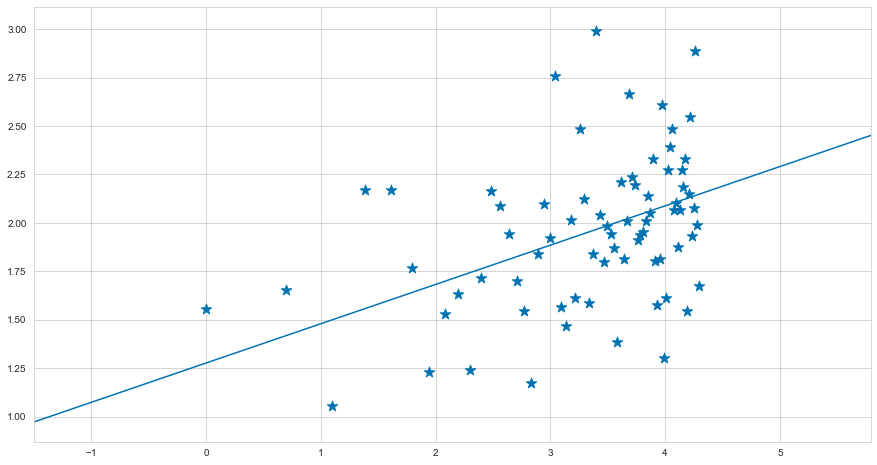

In [20]:
## Исходная функция
orig = lambda x : 0.203 * x + 1.276

## X-координаты точек данных
xd = np.log(np.concatenate([x_train, x_test], axis=0))
num_points = len(xd)

## Данные
data = orig(xd) + np.random.normal(0, 0.36, num_points)

## Для рисования
xs = np.arange(xd[0] - 1.5, xd[-1] + 1.5, 0.01)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.plot(xs, orig(xs))
ax.scatter(xd, data, marker='*', s=120)
plt.show()

In [21]:
from scipy.stats import multivariate_normal

# create data
N = 250
xs = np.linspace(-3, 3, N)
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2, ))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.scatter([.203], [1.276], marker='*', s=120)
    plt.show()

(250, 250)


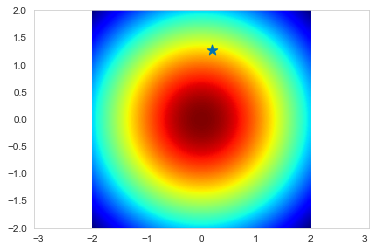

In [22]:
# Плотность распределения (априорное распределние весов W - P(W))

cur_mu, cur_sigma = np.array([0, 0]), 3 * np.array([[1, 0], [0, 1]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

myplot_heatmap(Z)

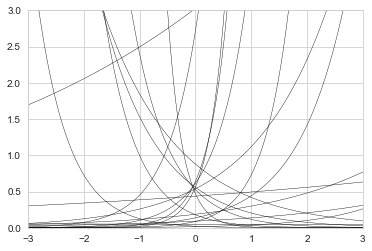

In [23]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1] * xs), 'k-', lw=.4)
    plt.ylim((0, 3))
    plt.xlim((-3, 3))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    plt.show()

myplot_sample_lines(cur_mu, cur_sigma, 20)

0.0 1.5539905823857993


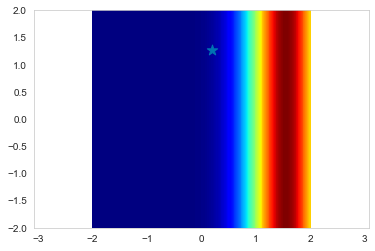

In [24]:
# Правдоподобие P(yk | W)
# одной точки

def get_likelihood(px, py):
    return lambda x : np.exp(-2 * (x[0] + x[1] * px - py) ** 2) / (0.36 * np.sqrt(2 * np.pi))

day = 0

print(xd[day], data[day])
px, py = xd[day], data[day]
cur_likelihood = get_likelihood(px, py)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])

myplot_heatmap(Z)

In [25]:
# Апостериорное распределение после одной точки данных

def bayesian_update(mu, sigma, x, y):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (0.36 ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (0.36 ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

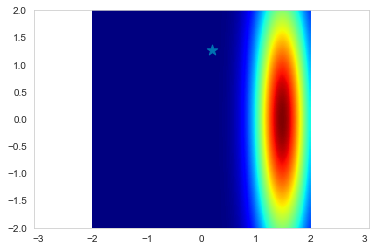

In [26]:
cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
myplot_heatmap(Z)

## 01.05.2020

In [27]:
x_test_date['2020-05-01']

60

4.110873864173311 1.877635076523437


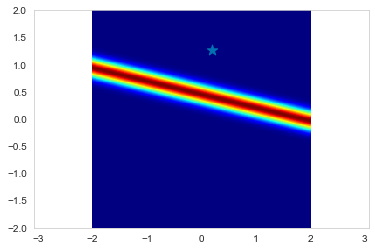

In [28]:
# Правдоподобие P(yk | W)
# одной точки

def get_likelihood(px, py):
    return lambda x : np.exp(-2 * (x[0] + x[1] * px - py) ** 2) / (0.36 * np.sqrt(2 * np.pi))

day = x_test_date['2020-05-01']

print(xd[day], data[day])
px, py = xd[day], data[day]
cur_likelihood = get_likelihood(px, py)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])

myplot_heatmap(Z)

In [29]:
# Апостериорное распределение после одной точки данных

def bayesian_update(mu, sigma, x, y):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (0.36 ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (0.36 ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

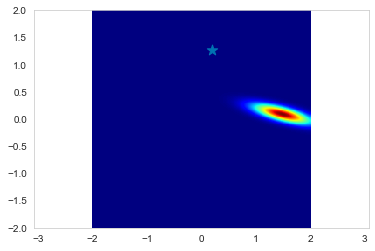

In [30]:
cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
myplot_heatmap(Z)

## Сэмплирование

Text(0, 0.5, 'Всего заболевших')

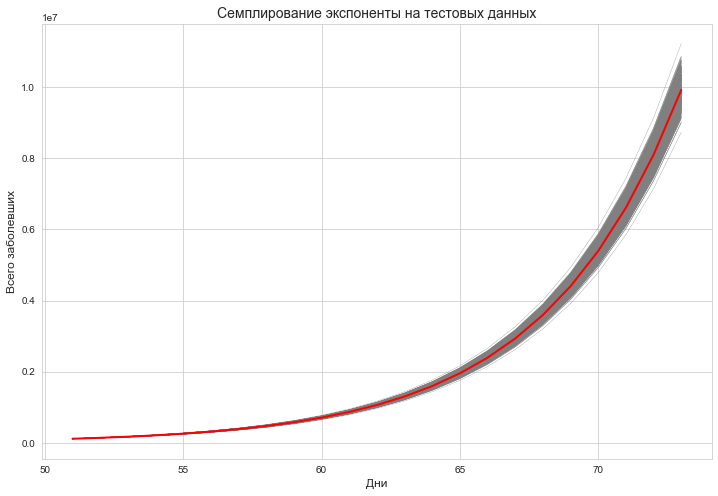

In [31]:
plt.figure(figsize=(12, 8))

N = 1000
num_points = len(x_train)

A = []
B = []
res = []
for _ in range(N):
    cur_data = x_train + np.random.normal(0, 0.36, num_points)
    regr = linear_model.LinearRegression().fit(cur_data.reshape(-1, 1), np.log(y_train))
    A.append(regr.coef_[0])
    B.append(regr.intercept_)
    res.append(regr.predict(x_test.reshape(-1, 1)))
    plt.plot(x_test, np.exp(regr.predict(x_test.reshape(-1, 1))), color='grey', linewidth=0.3)

def semp_exp(a, b, x):
    return np.exp(a * x + b)

semp_exp_vec = np.vectorize(semp_exp)

A = np.mean(A, axis=0)
B = np.mean(B, axis=0)

plt.title('Cемплирование экспоненты на тестовых данных', fontsize=14) 
plt.plot(x_test, semp_exp_vec(A, B, x_test), color='red', linewidth=2)
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Всего заболевших', fontsize=12)

# Аппроксимация сигмоидой

In [33]:
from scipy.integrate import quad
import numpy as np

def gauss(B, t):
    return np.exp(B * -t**2 / 2)

def gauss_sigm(A, B, C, x):
    k = A / np.sqrt(2 * np.pi)
    f_und_int = lambda t, B: np.exp(B * -t**2 / 2)
    return k * quad(f_und_int, -np.inf, x - C, args=(B))[0]

b = np.linspace(-20, 20, 21)
gauss_sigm_vec = np.vectorize(gauss_sigm)
a = gauss_sigm_vec(0.3, 0.07, 10, b)

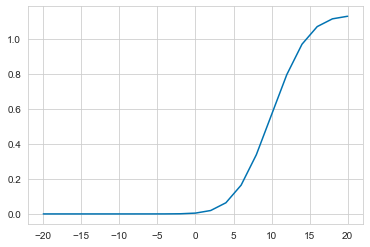

In [34]:
plt.plot(b, a)

In [35]:
def loss_train(A, B, C):
    y_pred = gauss_sigm_vec(A, B, C, x_train)
    return np.sqrt(mean_squared_error(y_train, y_pred))

In [36]:
from scipy.optimize import minimize

def func(args):
    return loss_train(*args)

def callback_Nelder(res):
    print(res, func(res))
    
res = minimize(func, 
               x0=np.array([10000, 0.1, 20]),
               method='Nelder-Mead',
               callback=callback_Nelder, 
               tol = 1e-3, 
               options={'maxiter':1000, 'disp': True},
              )

[9.00e+03 1.05e-01 2.10e+01] 14980.572465583537
[9.00e+03 1.05e-01 2.10e+01] 14980.572465583537
[8.33333333e+03 1.01666667e-01 2.33333333e+01] 12954.599355885493
[6.66666667e+03 1.13333333e-01 2.36666667e+01] 10392.273462230974
[6.66666667e+03 1.13333333e-01 2.36666667e+01] 10392.273462230974
[5.44444444e+03 1.09444444e-01 2.63333333e+01] 9028.313303698034
[5.44444444e+03 1.09444444e-01 2.63333333e+01] 9028.313303698034
[5.44444444e+03 1.09444444e-01 2.63333333e+01] 9028.313303698034
[5.44444444e+03 1.09444444e-01 2.63333333e+01] 9028.313303698034
[5.44444444e+03 1.09444444e-01 2.63333333e+01] 9028.313303698034
[5.65843621e+03 1.12201646e-01 2.64444444e+01] 9026.776985245277
[5.65843621e+03 1.12201646e-01 2.64444444e+01] 9026.776985245277
[5.65912209e+03 1.07434842e-01 2.78518519e+01] 8653.15681229536
[5.65912209e+03 1.07434842e-01 2.78518519e+01] 8653.15681229536
[5.65912209e+03 1.07434842e-01 2.78518519e+01] 8653.15681229536
[6.40855053e+03 9.72405121e-02 3.00123457e+01] 8132.2591822

[1.98790102e+04 5.65776967e-03 6.24390553e+01] 400.18944790930186
[1.98790102e+04 5.65776967e-03 6.24390553e+01] 400.18944790930186
[1.99992669e+04 5.61904555e-03 6.25633234e+01] 399.6681079901379
[1.99992669e+04 5.61904555e-03 6.25633234e+01] 399.6681079901379
[1.99992669e+04 5.61904555e-03 6.25633234e+01] 399.6681079901379
[1.98857903e+04 5.66217488e-03 6.24253496e+01] 398.99791426251284
[2.01586383e+04 5.57852881e-03 6.27121057e+01] 398.6022801920235
[2.01586383e+04 5.57852881e-03 6.27121057e+01] 398.6022801920235
[2.02208021e+04 5.57089684e-03 6.27434255e+01] 397.33665295944195
[2.02208021e+04 5.57089684e-03 6.27434255e+01] 397.33665295944195
[2.03684454e+04 5.53040851e-03 6.28925402e+01] 396.96626517873506
[2.02738840e+04 5.58369716e-03 6.27330578e+01] 394.19138802245436
[2.02738840e+04 5.58369716e-03 6.27330578e+01] 394.19138802245436
[2.06313344e+04 5.49508853e-03 6.30626070e+01] 392.77565896378894
[2.05989368e+04 5.54074521e-03 6.29344443e+01] 390.6810602841235
[2.06429367e+04 

[7.36645301e+04 3.21041856e-03 8.16623214e+01] 197.14867599962213
[7.29898003e+04 3.22188021e-03 8.15053630e+01] 196.40507488177101
[7.29898003e+04 3.22188021e-03 8.15053630e+01] 196.40507488177101
[7.29898003e+04 3.22188021e-03 8.15053630e+01] 196.40507488177101
[7.39991892e+04 3.21759586e-03 8.16493123e+01] 196.1272218572873
[7.66479902e+04 3.16409916e-03 8.22552125e+01] 195.16752272876
[7.66479902e+04 3.16409916e-03 8.22552125e+01] 195.16752272876
[7.55104919e+04 3.20386533e-03 8.18852614e+01] 193.9563301408114
[7.55104919e+04 3.20386533e-03 8.18852614e+01] 193.9563301408114
[7.96748213e+04 3.12105037e-03 8.28446450e+01] 193.94176035402282
[7.96748213e+04 3.12105037e-03 8.28446450e+01] 193.94176035402282
[7.96748213e+04 3.12105037e-03 8.28446450e+01] 193.94176035402282
[7.74145225e+04 3.18105472e-03 8.22196798e+01] 192.60332812986636
[7.74145225e+04 3.18105472e-03 8.22196798e+01] 192.60332812986636
[8.15624359e+04 3.09948608e-03 8.31754030e+01] 192.58819156955934
[7.86565161e+04 3.1

[1.45383711e+05 2.63892931e-03 9.13421482e+01] 179.73617484960934
[1.46303523e+05 2.63474588e-03 9.14315478e+01] 179.73282022556356
[1.46718331e+05 2.63106371e-03 9.14881662e+01] 179.73197423228663
[1.47327113e+05 2.62944770e-03 9.15339825e+01] 179.69623047417275
[1.47327113e+05 2.62944770e-03 9.15339825e+01] 179.69623047417275
[1.47327113e+05 2.62944770e-03 9.15339825e+01] 179.69623047417275
[1.50587667e+05 2.61387459e-03 9.18525062e+01] 179.64602973579085
[1.50587667e+05 2.61387459e-03 9.18525062e+01] 179.64602973579085
[1.50587667e+05 2.61387459e-03 9.18525062e+01] 179.64602973579085
[1.52108702e+05 2.60854654e-03 9.19819628e+01] 179.64417437416935
[1.54613182e+05 2.59567847e-03 9.22325570e+01] 179.61029024251098
[1.54613182e+05 2.59567847e-03 9.22325570e+01] 179.61029024251098
[1.54613182e+05 2.59567847e-03 9.22325570e+01] 179.61029024251098
[1.54739974e+05 2.59556910e-03 9.22385868e+01] 179.5985184861805
[1.54739974e+05 2.59556910e-03 9.22385868e+01] 179.5985184861805
[1.54739974e

In [37]:
res.x[0], res.x[1], res.x[2]

(159109.666475226, 0.002577947500634026, 92.6259768059171)

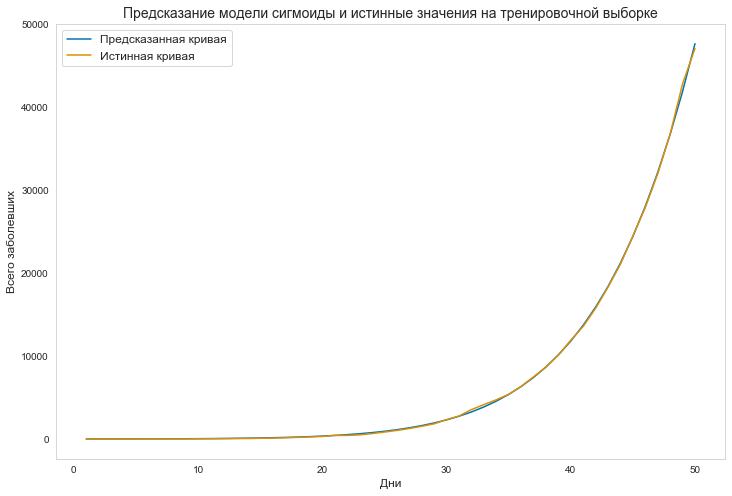

In [38]:
def gauss_sigm(A, B, C, x):
    k = A / np.sqrt(2 * np.pi)
    f_und_int = lambda t, B: np.exp(B * -t**2 / 2)
    return k * quad(f_und_int, -np.inf, x - C, args=(B))[0]

gauss_sigm_vect = np.vectorize(gauss_sigm)
gauss_sigm_vect(res.x[0], res.x[1], res.x[2], [1, 2, 3])

y_pred_tr_sigm = gauss_sigm_vect(res.x[0], res.x[1], res.x[2], x_train)

plt.figure(figsize=(12, 8))
plt.title('Предсказание модели сигмоиды и истинные значения на тренировочной выборке', fontsize=14)
plt.plot(x_train, y_pred_tr_sigm, label='Предсказанная кривая')
plt.plot(x_train, y_train, label='Истинная кривая')
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Всего заболевших', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid()

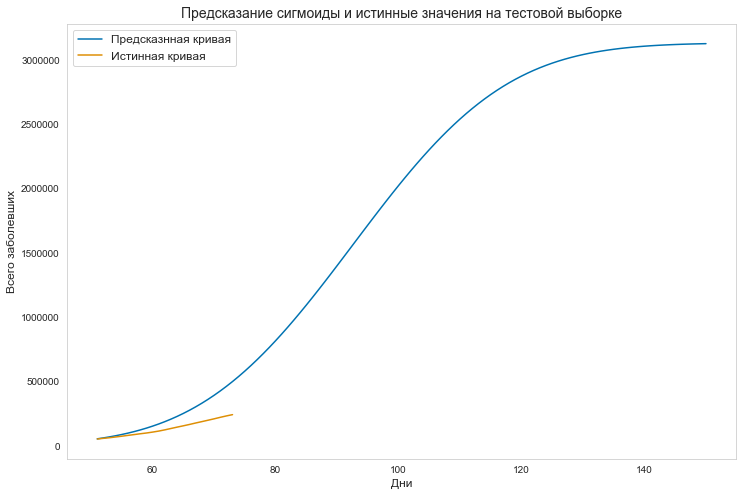

In [39]:
x_test = np.arange(1 + len(train_dataset['date'].values), 73 + 1, 1)
x_test_1 = np.arange(1 + len(train_dataset['date'].values), 150 + 1, 1)

y_pred = gauss_sigm_vect(res.x[0], res.x[1], res.x[2], x_test_1)

plt.figure(figsize=(12, 8))
plt.title('Предсказание сигмоиды и истинные значения на тестовой выборке', fontsize=14)
plt.plot(x_test_1, y_pred, label='Предсказнная кривая')
plt.plot(x_test, y_test, label='Истинная кривая')
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Всего заболевших', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid()

## Сравнение моделей 

## Экспонента 

In [40]:
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(
    y_train,
    np.exp(regr.predict(x_train.reshape(-1, 1))),
    #squared=False, # if True - MSE
))

test_rmse = np.sqrt(mean_squared_error(
    y_test,
    np.exp(regr.predict(x_test.reshape(-1, 1))),
    #squared=False, # if True - MSE
))


print('RMSE на тренировочных данных: {:.3f}'.format(train_rmse))
print('RMSE на тренировочных данных: {:.3f}'.format(test_rmse))

RMSE на тренировочных данных: 9446.410
RMSE на тренировочных данных: 3450831.727


In [41]:
# Предсказания экспоненты на определенную дату

may_01 = 60
june_01 = may_01 + 31
sept_01 = june_01 + 61

print('Число зараженных к 1 мая: {}'.format(semp_exp_vec(A, B, may_01)))
print('Число зараженных к 1 июня: {}'.format(semp_exp_vec(A, B, june_01)))
print('Число зараженных к 1 сентября: {}'.format(semp_exp_vec(A, B, sept_01)))

Число зараженных к 1 мая: 707227.6293268325
Число зараженных к 1 июня: 384750488.95912576
Число зараженных к 1 сентября: 92933714967954.27


## Сигмоида 

In [42]:
train_rmse = np.sqrt(mean_squared_error(
    y_train,
    gauss_sigm_vect(res.x[0], res.x[1], res.x[2], x_train),
    #squared=False, # if True - MSE
))

test_rmse = np.sqrt(mean_squared_error(
    y_test,
    gauss_sigm_vect(res.x[0], res.x[1], res.x[2], x_test),
    #squared=False, # if True - MSE
))

print('RMSE на тренировочных данных: {:.3f}'.format(train_rmse))
print('RMSE на тренировочных данных: {:.3f}'.format(test_rmse))

RMSE на тренировочных данных: 179.577
RMSE на тренировочных данных: 114963.607


In [43]:
# Предсказания сигмоиды на определенную дату

may_01 = 60
june_01 = may_01 + 31
sept_01 = june_01 + 61

print('Число зараженных к 1 мая: {}'.format(gauss_sigm_vect(res.x[0], res.x[1], res.x[2], may_01)))
print('Число зараженных к 1 июня: {}'.format(gauss_sigm_vect(res.x[0], res.x[1], res.x[2], june_01)))
print('Число зараженных к 1 сентября: {}'.format(gauss_sigm_vect(res.x[0], res.x[1], res.x[2], sept_01)))

Число зараженных к 1 мая: 152946.56422758522
Число зараженных к 1 июня: 1463764.9342889593
Число зараженных к 1 сентября: 3129683.7890533498
